## Chapter 3
## Linear Regression

### Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics as stats

It assumes that there is approximately a linear regression b/w X and y. Mathematically we can write this relationship as $$Y = \beta_0 + \beta_1 X$$
where $\beta_0$ represents _intercept_ and $\beta_1$ represents _slope_.

Once we estimate these parameters we can predict y using 
$$\hat y = \hat \beta_0 + \hat \beta_1 x$$
prediction of Y on the basis X = $x$.


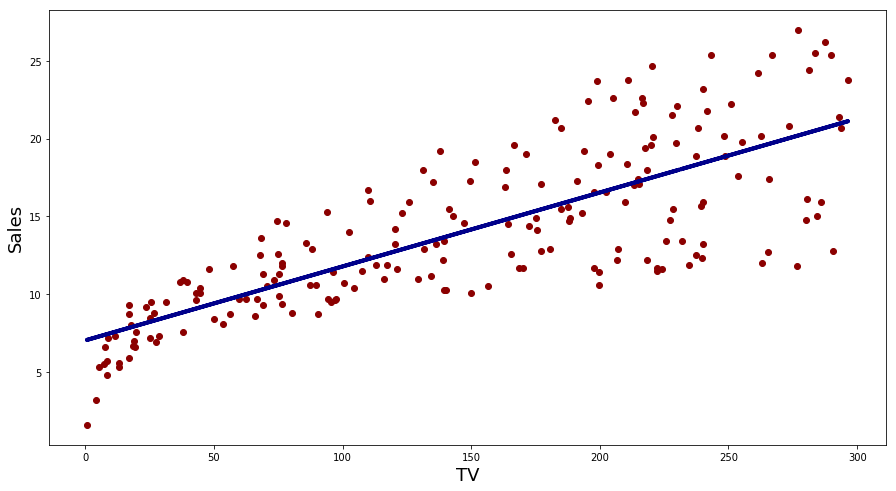

In [33]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
plt.figure(figsize = (15,8))
Advertising = pd.read_csv(url, index_col = 0)
plt.scatter(Advertising.TV, Advertising.Sales, color = "darkred")
z = np.polyfit(Advertising.TV, Advertising.Sales, 1) # fitting a straight line
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV", fontsize = 18)
plt.ylabel("Sales", fontsize = 18)
plt.show()

Let $\hat y_i = \beta_0 + \hat \beta_1 x_i$ be the prediction for Y based in the ith value of X. Then $e_i = y_i - \hat y_i$ represents the ith residual (this is the difference between the ith observed response value and the ith response value predicted by the linear model. Then residual sum of square(RSS) is $$RSS = e_1^2 + e_2^2 + .... + e_n^2$$.

According to the least square approach, we are minimizing the RSS to estimate the $\beta's$.

$$\hat \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^{n} (x_i - \bar x)^2}$$.
and $\hat \beta_0 = \bar y - \hat \beta_1 \bar x$

These are called least square estimates of the linear regression model.

In [68]:
intercept = 7.03
slope = 0.0475
b0 = np.linspace(intercept - 2, intercept + 2, 50)
b1 = np.linspace(slope - 0.02, slope + 0.02, 50)
X, Y = np.meshgrid(b0, b1)
rss = np.zeros((b0.size, b0.size))

for (i,j),k in np.ndenumerate(X):
    rss[i,j] = ((Advertising.Sales - (X[i,j] + Advertising.TV.ravel() * Y[i,j]))**2).sum()/1000

min_RSS = ((Advertising.Sales - (intercept + Advertising.TV* slope))**2).sum()/1000
min_RSS

2.1025452924375

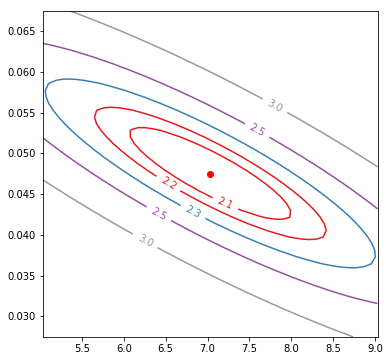

In [73]:
plt.figure(figsize = (6,6))
CS = plt.contour(X,Y,rss, cmap = plt.cm.Set1, levels = [2.15, 2.2, 2.3, 2.5, 3])
plt.scatter(intercept, slope, color = 'r')
plt.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
plt.show()